**Data Collection**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/ecommerce_furniture_dataset_2024.csv")
print(df)

                                           productTitle originalPrice  \
0     Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   
1     Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN   
2     Desser For Bedroom With 7 Fabric Drawers Organ...       $78.40    
3     Modern Accent Boucle Chair,Upholstered Tufted ...           NaN   
4     Small Unit Simple Computer Desk Household Wood...       $48.82    
...                                                 ...           ...   
1995  Modern TV Stand Entertainment Center with Two ...           NaN   
1996  Large Wardrobe Armoire Closet with 3 Doors, Fr...           NaN   
1997  Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...           NaN   
1998  Furniture Acrylic Coffee Table Transparent Liv...           NaN   
1999  Bed Frane Bamboo and Metal Platform Bed Frame ...           NaN   

         price  sold        tagText  
0      $46.79    600  Free shipping  
1     $169.72      0  Free shipping  
2      $3

In [ ]:
print(df.columns)

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')


In [ ]:
print(df.dtypes)

productTitle     object
originalPrice    object
price            object
sold              int64
tagText          object
dtype: object


In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [ ]:
df.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,NaN,$99.48,0,Free shipping


**Data Preprocessing**

In [ ]:
print(df.isnull().sum())

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 2 to 1983
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   487 non-null    object
 1   originalPrice  487 non-null    object
 2   price          487 non-null    object
 3   sold           487 non-null    int64 
 4   tagText        487 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.8+ KB
None


In [ ]:
# Check for missing values
print(df[['originalPrice', 'price', 'sold']].isnull().sum())

originalPrice    2000
price            2000
sold                0
dtype: int64


In [ ]:
# Verify data types
print(df[['originalPrice', 'price', 'sold']].dtypes)

originalPrice    float64
price            float64
sold               int64
dtype: object


**Exploratory Data Analysis**

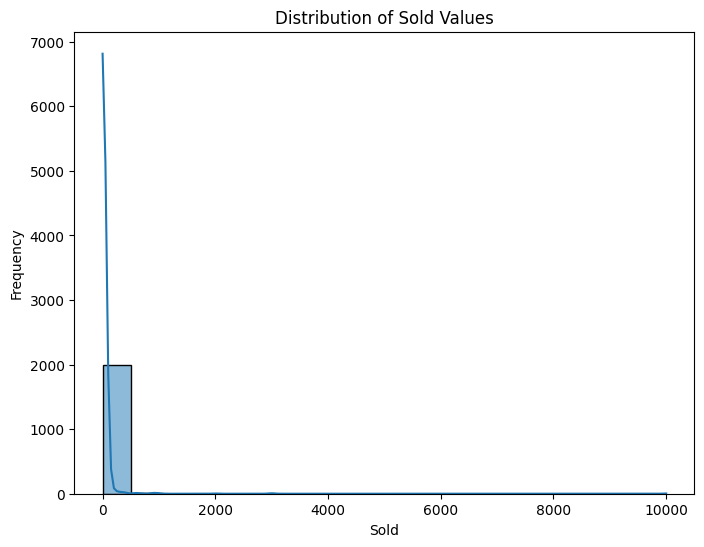

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot histogram
plt.figure(figsize=(8,6))
sns.histplot(df['sold'], bins=20, kde=True)
plt.title('Distribution of Sold Values')
plt.xlabel('Sold')
plt.ylabel('Frequency')
plt.show()


summary statistics

In [ ]:
print(df['sold'].describe())

count      487.000000
mean        75.667351
std        510.047670
min          0.000000
25%          4.000000
50%         10.000000
75%         28.000000
max      10000.000000
Name: sold, dtype: float64


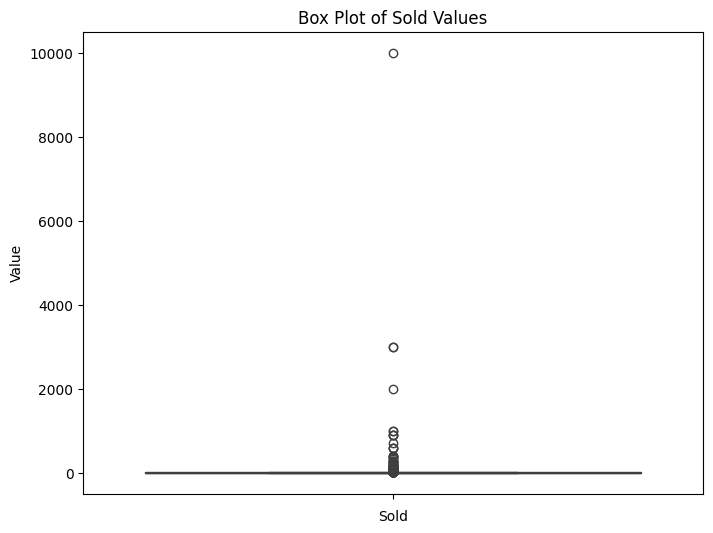

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['sold'])
plt.title('Box Plot of Sold Values')
plt.xlabel('Sold')
plt.ylabel('Value')
plt.show()

In [ ]:
df['originalPrice'] = df['originalPrice'].fillna(df['originalPrice'].mean())
df['price'] = df['price'].fillna(df['price'].mean())
df['sold'] = df['sold'].fillna(df['sold'].mean())

**Relationship between Price,Original Price and Items Sold**

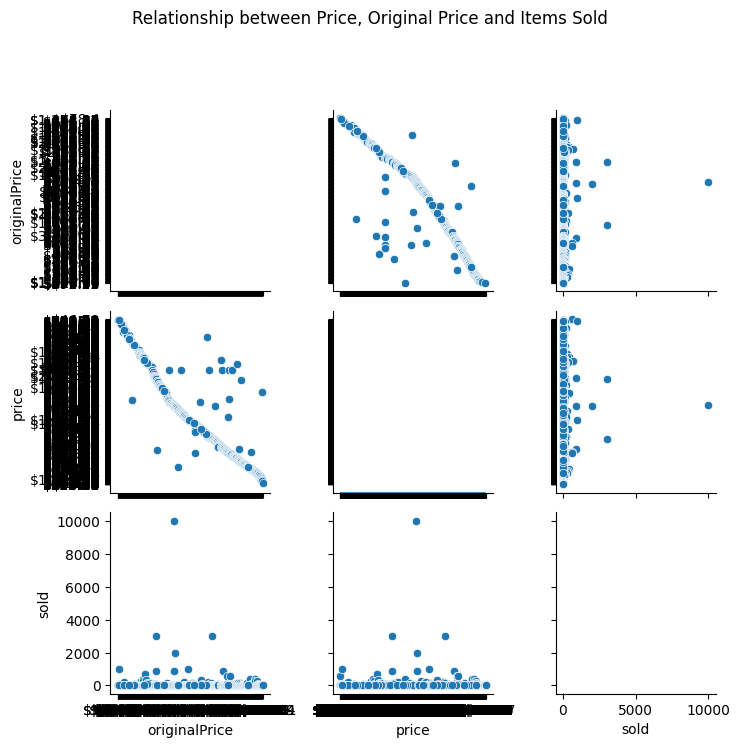

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
g = sns.pairplot(df, vars=['originalPrice', 'price', 'sold'], kind='scatter')

# Add title
g.fig.suptitle('Relationship between Price, Original Price and Items Sold', y=1.02)

# Show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()



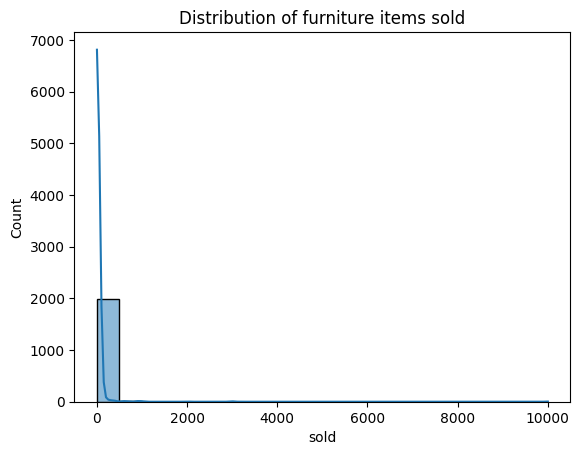

In [ ]:
sns.histplot(df['sold'], bins=20, kde=True)
plt.title('Distribution of furniture items sold')
plt.show()

**Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

# Clean price columns
df["price"] = pd.to_numeric(df["price"].str.replace("[$, ]", "", regex=True), errors='coerce')
df["originalPrice"] = pd.to_numeric(df["originalPrice"].str.replace("[$, ]", "", regex=True), errors='coerce')

# Feature Engineering
df["discount"] = df["originalPrice"] - df["price"]
df["discount_percent"] = np.where(df["originalPrice"] > 0, (df["discount"] / df["originalPrice"]) * 100, 0)
df["is_discounted"] = df["discount"] > 0
df["revenue"] = df["price"] * df["sold"]



**Model Selection and Training (predicting sold quantity)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv("ecommerce_furniture_dataset_2024.csv")

# Clean price columns
df["price"] = pd.to_numeric(df["price"].str.replace("[$, ]", "", regex=True), errors='coerce')
df["originalPrice"] = pd.to_numeric(df["originalPrice"].str.replace("[$, ]", "", regex=True), errors='coerce')

# Feature Engineering
df["discount"] = df["originalPrice"] - df["price"]
df["discount_percent"] = np.where(df["originalPrice"] > 0,
(df["discount"] / df["originalPrice"]) * 100, 0)
df["is_discounted"] = df["discount"] > 0

# Features and target
features = ["price", "originalPrice", "discount", "discount_percent", "is_discounted"]
df = df.dropna(subset=features + ["sold"])
X = df[features].copy()
 # Add .copy() to avoid warning
X["is_discounted"] = X["is_discounted"].astype(int)
y = df["sold"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Make predictions and calculate RMSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


RMSE: 601.8299190481291
